In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Función de simulación Euler-Maruyama
# ------------------------------
def simulate_path_logistic(r, sigma, N0, dt, n, K):
    N = np.zeros(n)
    N[0] = N0
    for i in range(1, n):
        dW = np.sqrt(dt) * np.random.randn()
        N[i] = N[i-1] + r*N[i-1]*(1 - N[i-1]/K)*dt + sigma*N[i-1]*dW
        if N[i] < 0:
            N[i] = 0
    return N

In [7]:
# Experimento 4: Fijar sigma y hacer varias trayectorias con distintos N0
def experiment4(r=0.2, T=100, dt=0.001, sigma=0.2, K=1000, N0_values=[10, 1000, 3000]):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    plt.figure(figsize=(10, 6))
    for N0 in N0_values:
        N = simulate_path_logistic(r, sigma, N0, dt, n, K)
        plt.plot(t, N, label=f'$N_0={N0}$', alpha=0.7)
    plt.axhline(K, color='k', linestyle='--')

    plt.xlabel('Tiempo t')
    plt.ylabel('Población N(t)')
    plt.legend()
    plt.grid()
    plt.savefig('experiment4.png', dpi=1000, bbox_inches='tight')
    plt.show()

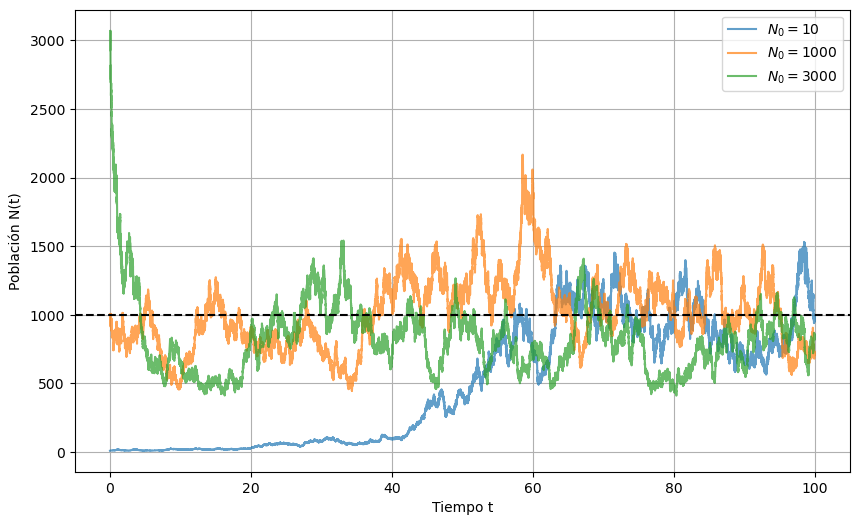

In [8]:
experiment4(sigma=0.2)

In [ ]:
def experimento5(r=0.2, N0=100, T=20, dt=0.001, sigmas=[0.05, 0.2, 0.5], num_paths=10, K=1000):
    n=int(T/dt)
    t = np.linspace(0, T, n)

    plt.figure(figsize=(15, 10))
    for i, sigma in enumerate(sigmas):
        plt.subplot(1, len(sigmas), i+1)
        for _ in range(num_paths):
            N = simulate_path_logistic(r, sigma, N0, dt, n, K)
            plt.plot(t, N, alpha=0.6)
        plt.title(f'Sigma = {sigma}')
        plt.xlabel("Tiempo")
        plt.axhline(K, color='k', linestyle='--')
        if i == 0:
            plt.ylabel("Población")
        plt.grid(alpha=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('experiment4.png', dpi=900, bbox_inches='tight')
    plt.show()

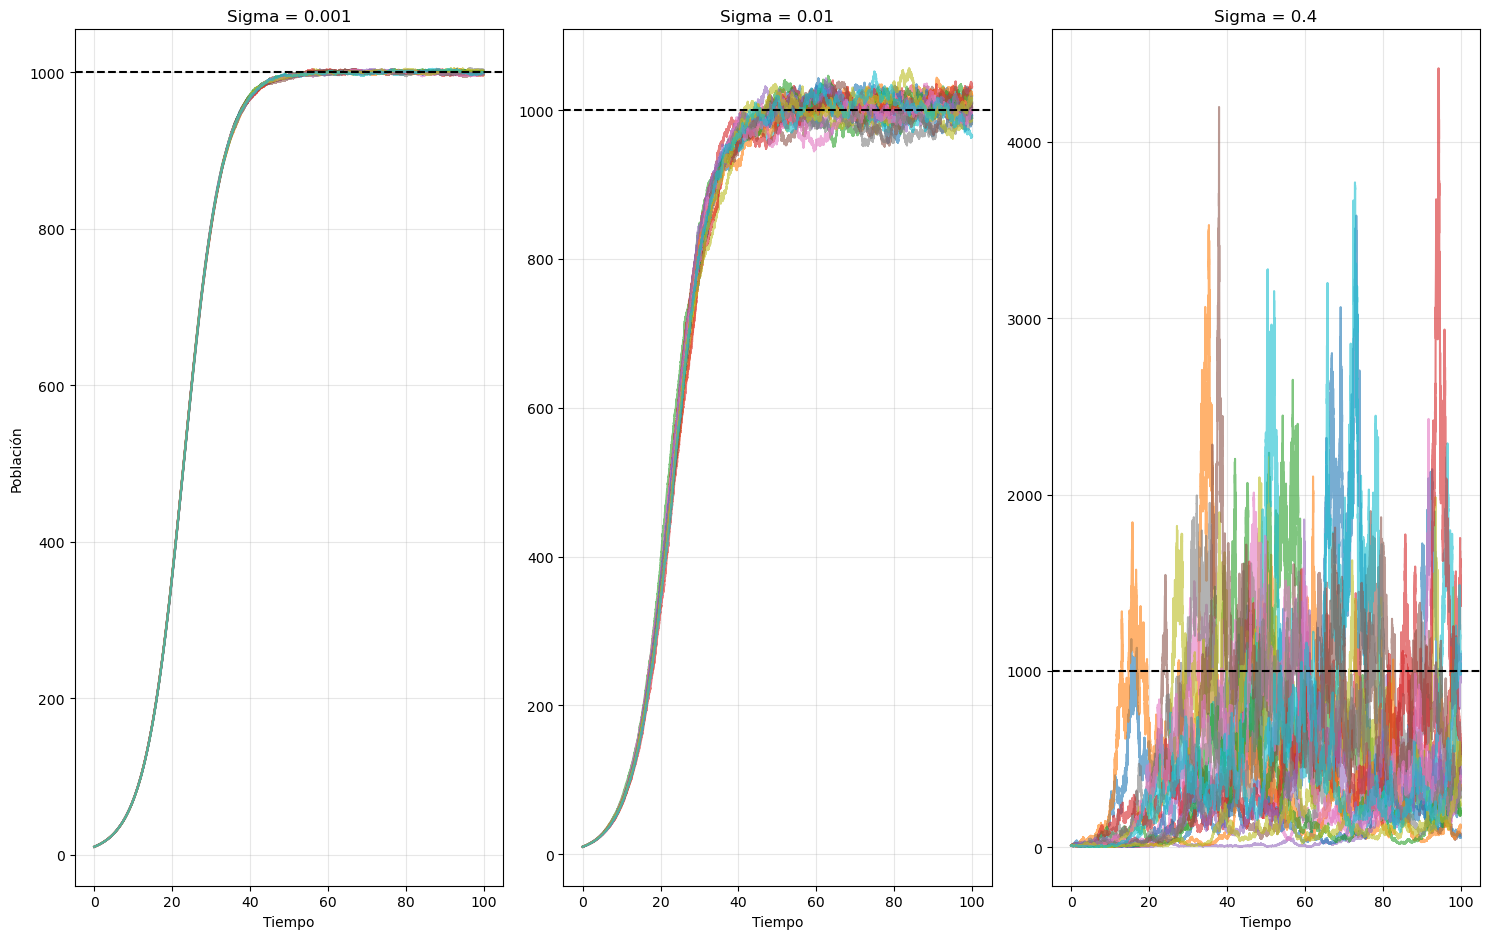

In [ ]:
experimento5(r=0.2,N0=10, num_paths=20, T=100, sigmas=[0.001, 0.01, 0.4])

In [3]:
def experiment6(r=0.2, N0=100, T=100, dt=0.001, sigma=0.2, num_runs=2000, K=1000):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    data = np.zeros((num_runs, n))
    for k in range(num_runs):
        data[k] = simulate_path_logistic(r, sigma, N0, dt, n, K)
    
    mean_N = np.mean(data, axis=0)
    median_N = np.median(data, axis=0)
    deterministic = K / (1 + (K/N0 - 1) * np.exp(-r * t))
    
    plt.figure(figsize=(12, 7))
    plt.plot(t, mean_N, label="Media", linewidth=2)
    plt.plot(t, median_N, label="Mediana", linewidth=2)
    plt.plot(t, deterministic, 'k--', label="Solución determinista")
    plt.xlabel("Tiempo")
    plt.ylabel("Población")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

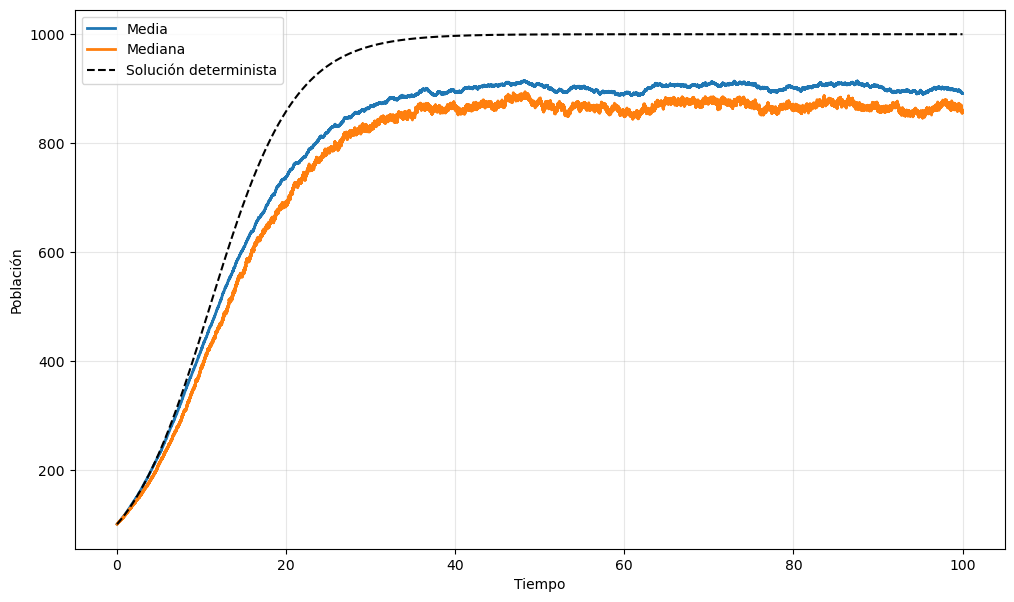

In [ ]:
experiment6(sigma=0.2)

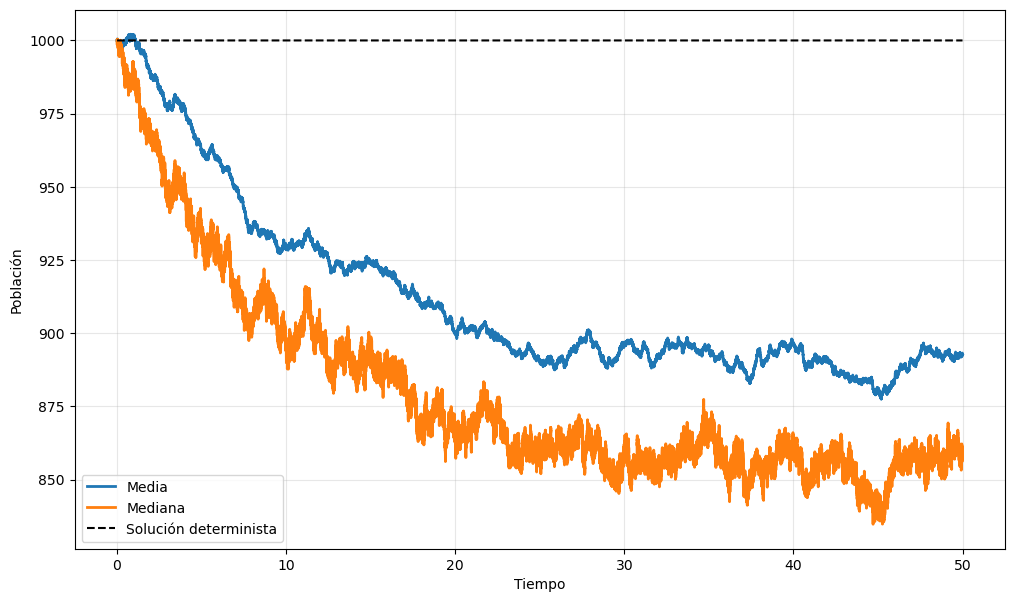

In [5]:
experiment6(sigma=0.2, N0=1000, T=50)

In [ ]:
def experiment7(r=0.2, N0=100, T=20, dt=0.001, sigmas=[0.1, 0.4], num_runs=5000, K=1000):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    plt.figure(figsize=(12, 5))
    for idx, sigma in enumerate(sigmas):
        final_values = []
        for k in range(num_runs):
            N = simulate_path_logistic(r, sigma, N0, dt, n, K)
            final_values.append(N[-1])
        plt.subplot(1, len(sigmas), idx+1)
        plt.hist(final_values, bins=80, density=True, alpha=0.7)
        plt.title(f"Distribución de N(T) para σ = {sigma}")
        plt.xlabel("Valor final N(T)")
        plt.ylabel("Densidad")
        plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

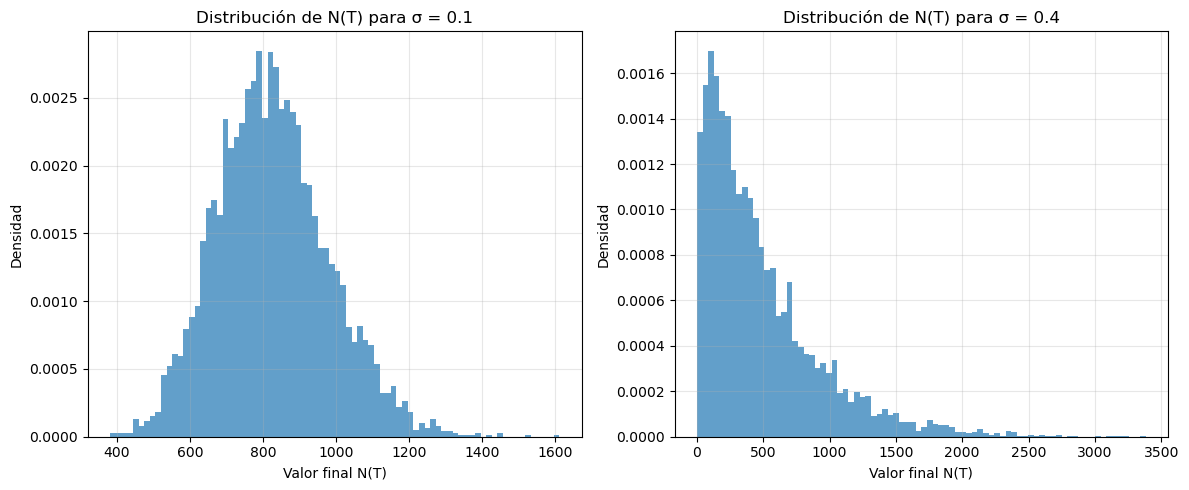

In [ ]:
experiment7()